# Probability Learner

This notebook uses a pure Python implementation of a simplified version of the model described in [this paper](http://www.ncbi.nlm.nih.gov/pubmed/17676057).

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import optlearner

## Initialize the learner

In [3]:
learner = optlearner.ProbabilityLearner()

In [4]:
p_grid = learner.p_grid
I_grid = learner.I_grid

## Show the Bayes net

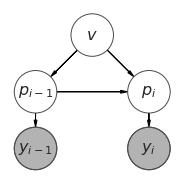

In [5]:
with mpl.rc_context({"font.size": 16}):
    learner.show_model();

## Basic timing data

In [ ]:
%timeit optlearner.ProbabilityLearner()

In [ ]:
%timeit learner.fit([0])

## Transition matrices

In [6]:
def plot_slices(grid, joint, cmap, step=2, var=""):
    pal = sns.blend_palette(sns.mpl_palette(cmap, 6), as_cmap=True)
    f, axes = plt.subplots(4, 4, figsize=(7, 7), sharex=True, sharey=True)
    xx, yy = np.meshgrid(grid, grid)
    for k, ax in zip(np.arange(learner._I_size) * step, axes.flat):
        ax.contour(xx, yy, joint[:, :, k], cmap=pal, vmin=joint.min(), vmax=joint.max())
    if var:
        for ax in axes[-1, :]:
            ax.set_xlabel(r"$%s_{i+1}$" % var, size=14)
        for ax in axes[:, 0]:
            ax.set_ylabel(r"$%s_{i}$" % var, size=14)
    plt.tight_layout()

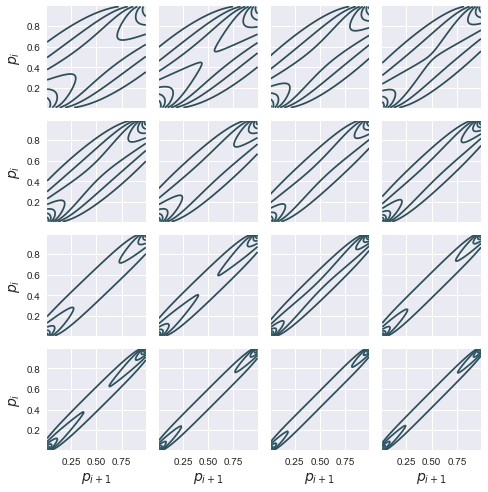

In [7]:
plot_slices(learner.p_grid, learner._p_trans, "PuBuGn_d", var="p")

## Example model fits

In [8]:
learner = optlearner.ProbabilityLearner()

In [44]:
static_p = np.ones(500) * .8
static_y = stats.binom.rvs(1, static_p)

In [45]:
learner.reset()
learner.fit(static_y)

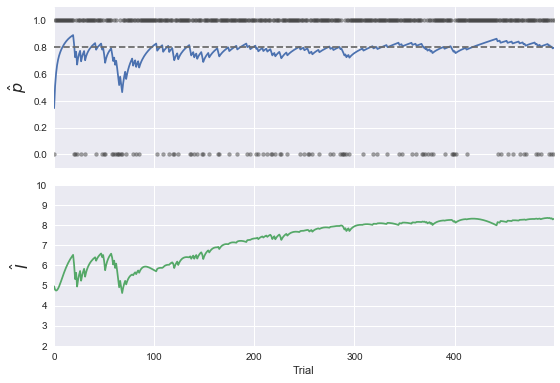

In [46]:
learner.plot_history(ground_truth=static_p)

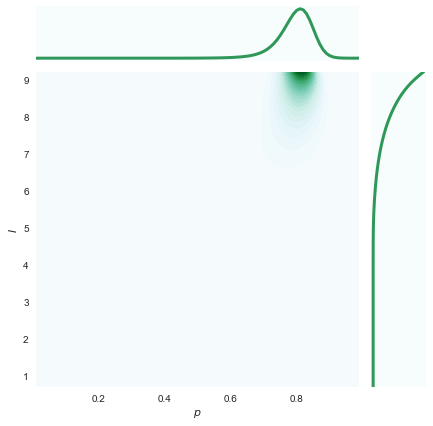

In [47]:
learner.plot_joint()

## Single transition

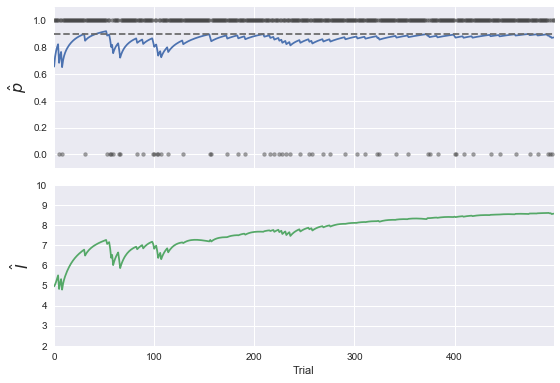

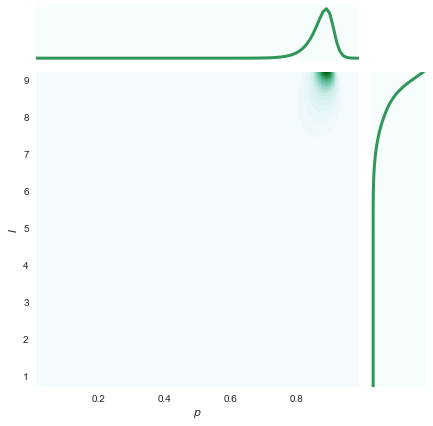

In [63]:
single_p = np.repeat([0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2], 30)
single_p = np.ones(500)*0.9
single_y = stats.binom.rvs(1, single_p)
learner.reset()
learner.fit(single_y)
learner.plot_history(ground_truth=single_p)
learner.plot_joint()

## Nonstationary probabilities, static volatility

In [21]:
moving_p = np.repeat([.75, .25, .75, .25, .75, .25], 100)
moving_y= stats.binom.rvs(1, moving_p)

In [22]:
learner.reset()
learner.fit(moving_y)

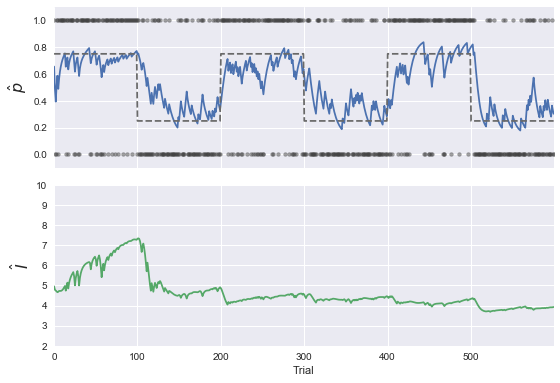

In [23]:
learner.plot_history(ground_truth=moving_p)

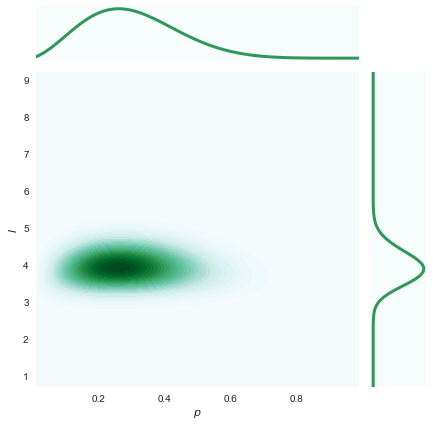

In [24]:
learner.plot_joint()

## Nonstationary probabilities and volatility

In [ ]:
metavol_p = np.repeat([.75, .75, .75, .25, .75, .25], 100)
metavol_y= stats.binom.rvs(1, metavol_p)

In [ ]:
learner.reset()
learner.fit(metavol_y)

In [ ]:
learner.plot_history(ground_truth=metavol_p)

In [ ]:
learner.plot_joint()

## Sinusoidal probabilities

In [ ]:
x = np.linspace(0, 60, 600)
sin_p = (np.sin(x / 3) + 1.5) / 3
sin_y = stats.binom.rvs(1, sin_p)

In [ ]:
learner.reset()
learner.fit(sin_y)

In [ ]:
learner.plot_history(ground_truth=sin_p)

In [ ]:
learner.plot_joint()